# Resample tests for regression

## 1. Import functions and load data, define functions, define all feature sets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.svm import SVR
from sklearn.utils import resample
from functions import load_and_prepare_data, select_features_by_pearson, get_dataframe_with_selected_features

X, y = load_and_prepare_data()
X.head()

,dd0 Cell Density,dd0-dd1 Cell Density Gradient,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2 Cell Density,dd2-dd3 Cell Density Gradient,dd3 Cell Density,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd5-dd7 Cell Density Gradient,...,dd1 Lactate Concentration,dd3 Lactate Concentration,dd5 Lactate Concentration,dd7 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration,dd3 Glucose Concentration,dd5 Glucose Concentration,dd7 Glucose Concentration,y
0,0.725,0.213793,0.88,0.19007,1.047261,-0.040354,1.005,0.810945,1.820,-0.144394,...,14.025,2.090,17.780,5.935,9.1800,3.895,9.8750,0.635,7.555,75.7
1,0.650,0.384615,0.90,0.19007,1.071063,0.246426,1.335,0.749064,2.335,-0.144394,...,13.350,2.165,17.105,12.510,9.5200,4.470,10.1450,1.010,2.910,75.0
2,0.880,0.022727,0.90,0.19007,1.071063,-0.038338,1.030,0.611650,1.660,-0.144394,...,13.670,1.775,19.050,7.210,9.0275,4.415,10.2700,0.000,6.745,55.6
3,0.785,0.363057,1.07,0.19007,1.273374,-0.462059,0.685,0.510949,1.035,-0.144394,...,11.955,0.995,16.430,14.295,8.9950,5.155,10.2550,2.270,2.135,57.7
4,0.410,0.975610,0.81,0.19007,0.963956,1.778134,2.678,-0.002987,2.670,-0.376404,...,11.300,15.100,16.425,14.455,9.5475,1.700,0.0175,1.610,1.065,63.0


In [ ]:
def add_gaussian_noise(data, noise_level=0.01, n_new_samples=100, random_state = None):
    """
    Adds Gaussian noise to create new samples from the existing data.
    
    Parameters:
    - data: pandas DataFrame or numpy array of shape (n_samples, n_features)
    - noise_level: float, standard deviation of the Gaussian noise
    - n_new_samples: int, number of new samples to generate
    
    Returns:
    - DataFrame or numpy array with the original and new samples
    """

    np.random.seed(random_state)
    # Generate Gaussian noise
    noise = np.random.normal(loc=0.0, scale=noise_level, size=(n_new_samples, data.shape[1]))
    
    # Select random samples from the original data
    original_samples = data.iloc[np.random.choice(data.shape[0], n_new_samples, replace=True)]
    
    # Create new samples by adding noise to the original samples
    new_samples = original_samples + noise
    
    # Combine the original and new samples
    augmented_data = np.vstack([data, new_samples])
    
    return augmented_data

In [2]:
# Get Pearson columns
cols_PearsonCorr = select_features_by_pearson(X)

# Feature set from study by Williams et al. (2020)
X_FS1_RF = get_dataframe_with_selected_features(X=X, feature_set_name='FS1_RF')

# Feature sets obtained with biclustering analysis
X_CCCB1 = get_dataframe_with_selected_features(X=X, feature_set_name='CCCB1')
X_CCCB1_1 = get_dataframe_with_selected_features(X=X, feature_set_name='CCCB1_1')

X_CCCB2 = get_dataframe_with_selected_features(X=X, feature_set_name='CCCB2')
X_CCCB2_1 = get_dataframe_with_selected_features(X=X, feature_set_name='CCCB2_1')

# Feature sets obtained with correlation coefficients
X_PearsonCorr = X[cols_PearsonCorr]

Number of variables with p-value <= 0.005: 9


## 2. Resample tests


In [ ]:
# cross validation method
loo_cv = LeaveOneOut()

# create model (best hyperparameters obtained before)
SVR_model = SVR(C=1000, gamma=1, kernel='linear')
standard_scaler = StandardScaler()

## 2.1. Bootstrapping the training data

- loo cv: for each division of data: 
    - define X_train and X_test (with indexes)
    - resample X_train
    - scaler fit to X_train and transform X_test
    - train/fit the model using X_train and y_train
    - test the model using X_test, obtaining y_pred
    - calculate mean absolute error using y_pred and y_test (y true)
    - keep score (MAE)
- compute mean MAE

Training the model without resampling:


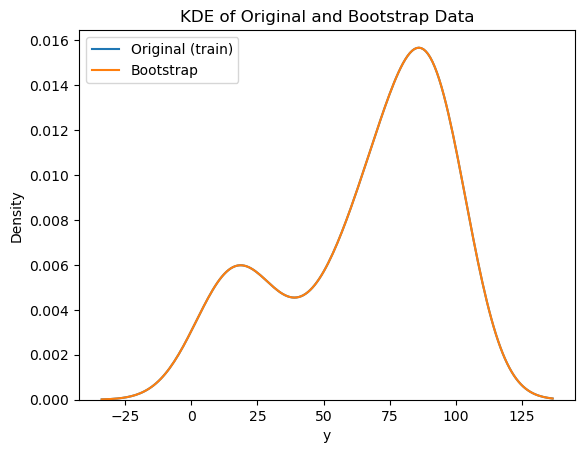

MAE obtained using Leave One Out CV: 15.148420438460365

Augmenting the dataset using a ratio of 2 :


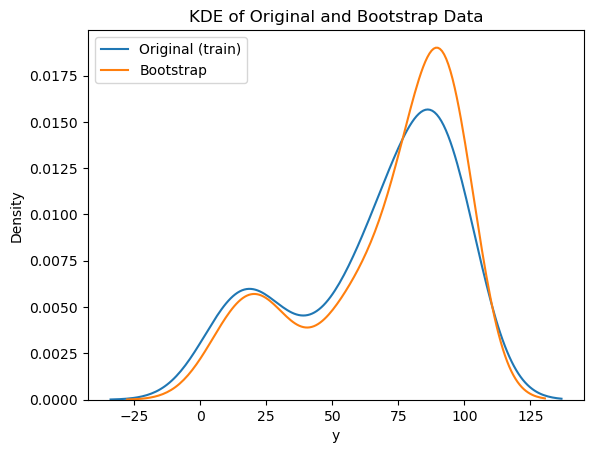

MAE obtained using Leave One Out CV: 16.54325265887993

Augmenting the dataset using a ratio of 5 :


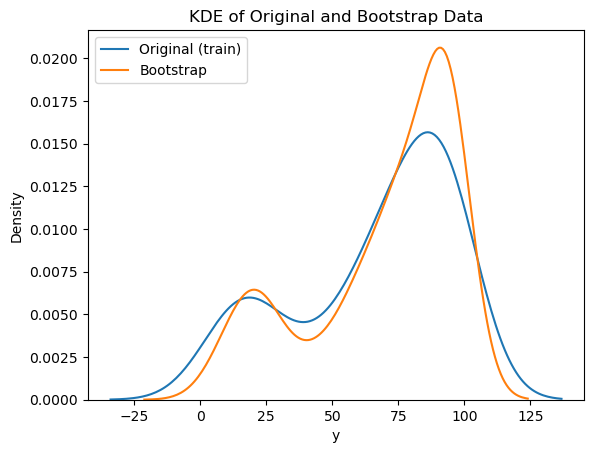

MAE obtained using Leave One Out CV: 17.651804624828888

Augmenting the dataset using a ratio of 10 :


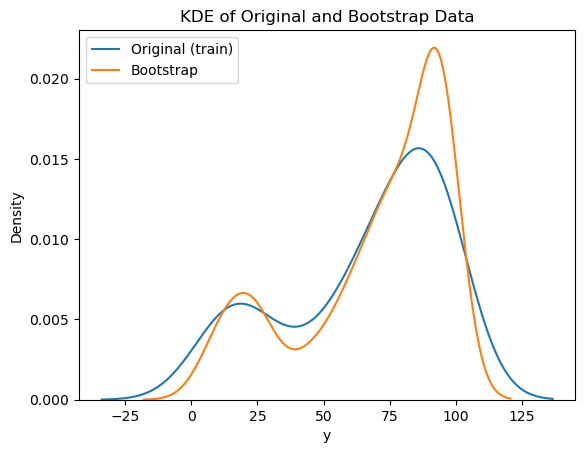

MAE obtained using Leave One Out CV: 16.563450372529193

Augmenting the dataset using a ratio of 20 :


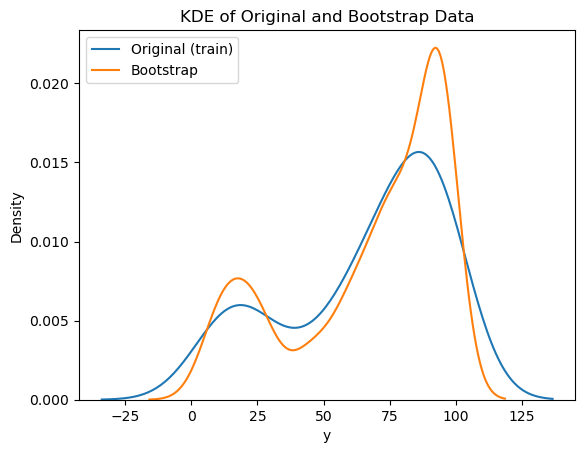

MAE obtained using Leave One Out CV: 15.83971253844938

Augmenting the dataset using a ratio of 30 :


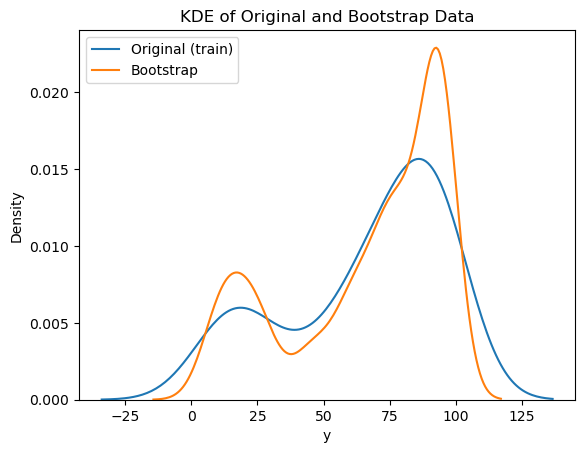

MAE obtained using Leave One Out CV: 15.151734467244344

Augmenting the dataset using a ratio of 40 :


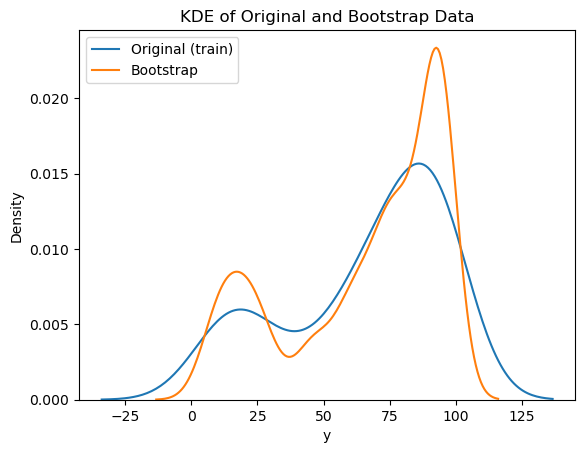

MAE obtained using Leave One Out CV: 15.549272967273588



In [ ]:
# sample size ratios to test
sample_size_ratio = [1,2,5,10,20,30,40]
means_MAE_list = []

for j in sample_size_ratio:
    MAEs_list = []
    if j == 1:
        print('Training the model without resampling:')
    else:
        print('Augmenting the dataset using a ratio of', j,':')

    for i, (train_index, test_index) in enumerate(loo_cv.split(X_PearsonCorr)):
        # Define train and test datasets
        X_train, y_train = X_PearsonCorr.iloc[train_index], y.iloc[train_index]
        X_test, y_test = X_PearsonCorr.iloc[test_index], y.iloc[test_index]
        
        if j > 1:
            # Resample (bootstrap X_train and y_train)
            n_samples = int(len(X_train) * j)
            X_train_boot, y_train_boot = resample(X_train, y_train, replace=True, n_samples=n_samples, random_state=42)

        else:
            X_train_boot = X_train
            y_train_boot = y_train

        # Standard Scaler
        scaler = StandardScaler()
        X_train_boot = scaler.fit_transform(X_train_boot)
        X_test = scaler.transform(X_test)

        y_train_boot = y_train_boot.values.ravel()

        # Fit the model to X_train and y_train (or resampled data)
        SVR_model.fit(X_train_boot, y_train_boot)
    
        y_pred_i = SVR_model.predict(X_test)
        MAE_fold_i = mean_absolute_error(y_test, y_pred_i)
        MAEs_list.append(MAE_fold_i)
    
    # plot the y_train original and y_train_boot generated in the last fold, for each sample size ratio
    sns.kdeplot(y_train, label = 'Original (train)')
    sns.kdeplot(y_train_boot, label = 'Bootstrap')
    plt.legend()
    plt.xlabel('y')
    plt.ylabel('Density')
    plt.title('KDE of Original and Bootstrap Data')
    plt.show()

    mean_MAE_j = np.mean(MAEs_list)
    print('MAE obtained using Leave One Out CV:', mean_MAE_j)
    print()
    means_MAE_list.append(mean_MAE_j)

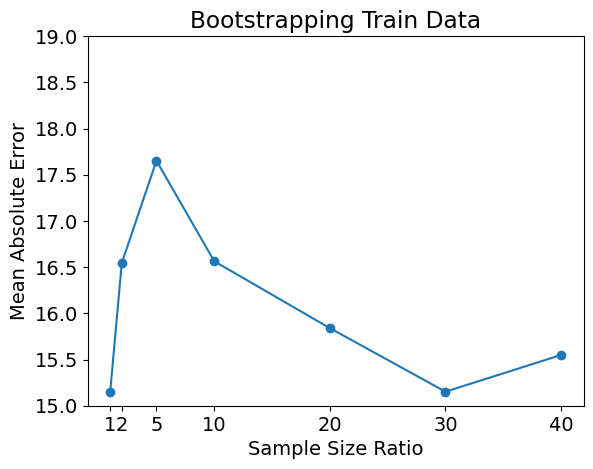

In [ ]:
# Create a plot
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots()
ax.plot(sample_size_ratio, means_MAE_list, marker = 'o')

ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('Sample Size Ratio')
plt.title('Bootstrapping Train Data')
plt.ylim(15,19)

ax.set_xticks([1,2,5,10,20,30,40])
plt.show()

## 2.2. Adding new data with Gaussian noise

Adding 50 new samples with Gaussian Noise to the training set:


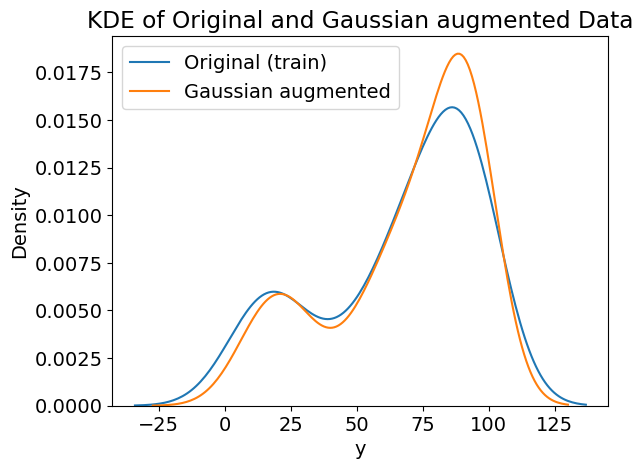

MAE obtained using Leave One Out CV: 20.264

Adding 100 new samples with Gaussian Noise to the training set:


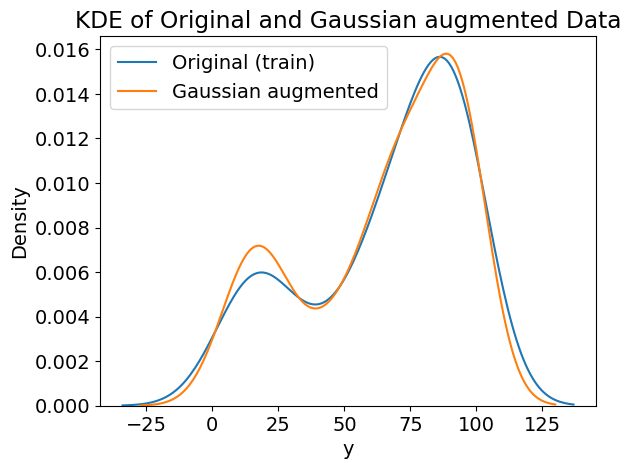

MAE obtained using Leave One Out CV: 19.596

Adding 150 new samples with Gaussian Noise to the training set:


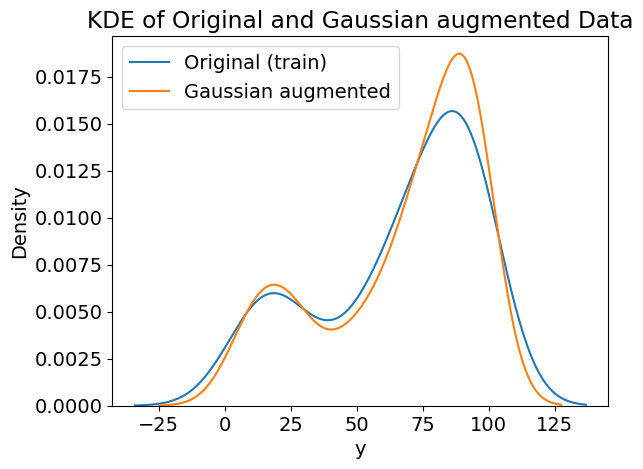

MAE obtained using Leave One Out CV: 21.394

Adding 200 new samples with Gaussian Noise to the training set:


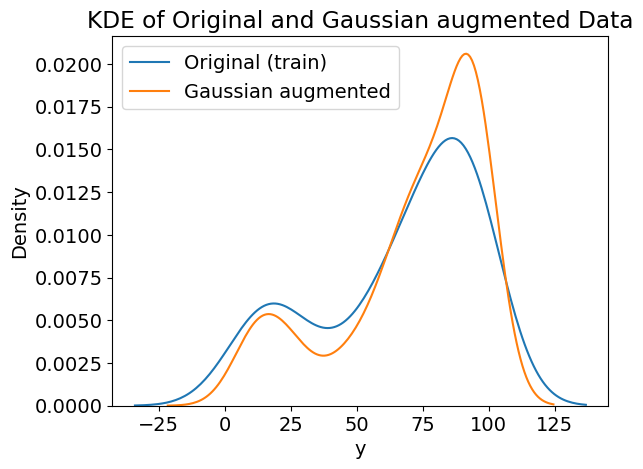

MAE obtained using Leave One Out CV: 17.993

Adding 250 new samples with Gaussian Noise to the training set:


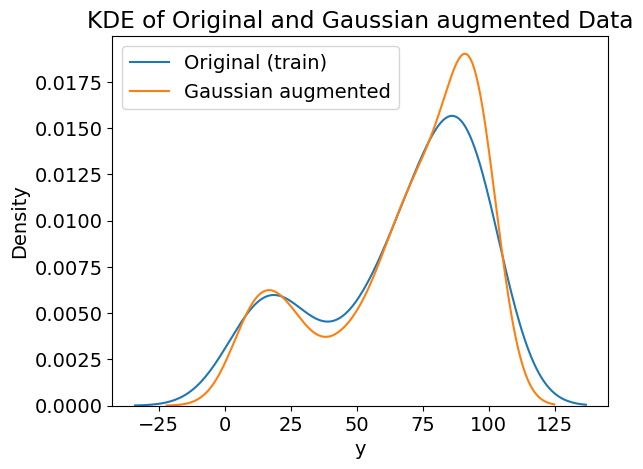

MAE obtained using Leave One Out CV: 21.818



In [ ]:
n_new_samples_list = [50,100,150,200,250]
random_state = 42
results_all_n_new_samples = []

for n_new_samples in n_new_samples_list:
        MAEs_Gaussian_noise_list = []
        print(f'Adding {n_new_samples} new samples with Gaussian Noise to the training set:')
        for i, (train_index, test_index) in enumerate(loo_cv.split(X_PearsonCorr)):
                # Define train and test datasets
                X_train, y_train = X_PearsonCorr.iloc[train_index], y.iloc[train_index]
                X_test, y_test = X_PearsonCorr.iloc[test_index], y.iloc[test_index]

                # add Gaussian noise to X train and y train
                X_train_augmented_Gaussian = add_gaussian_noise(X_train, noise_level=0.1, n_new_samples=n_new_samples, random_state=random_state)
                y_train_augmented_Gaussian = add_gaussian_noise(y_train, noise_level=0.1, n_new_samples=n_new_samples, random_state=random_state)

                X_train_augmented_Gaussian = pd.DataFrame(X_train_augmented_Gaussian, columns=cols_PearsonCorr)

                # Standard Scaler
                scaler = StandardScaler()
                X_train_augmented_Gaussian = scaler.fit_transform(X_train_augmented_Gaussian)
                X_test = scaler.transform(X_test)

                y_train_augmented_Gaussian = y_train_augmented_Gaussian.ravel()

                # Fit the model to X_train and y_train (or resampled data)
                SVR_model.fit(X_train_augmented_Gaussian, y_train_augmented_Gaussian)
        
                y_pred_i = SVR_model.predict(X_test)
                MAE_fold_i = mean_absolute_error(y_test, y_pred_i)
                MAEs_Gaussian_noise_list.append(MAE_fold_i)

        # plot the y_train original and y_train_augmented_Gaussian generated in the last fold, for each n_new_samples
        sns.kdeplot(y_train, label = 'Original (train)')
        sns.kdeplot(y_train_augmented_Gaussian, label = 'Gaussian augmented')
        plt.legend()
        plt.xlabel('y')
        plt.ylabel('Density')
        plt.title('KDE of Original and Gaussian augmented Data')
        plt.show()

        mean_MEA_Gaussian = np.mean(MAEs_Gaussian_noise_list)
        results_all_n_new_samples.append(mean_MEA_Gaussian)
        print(f'MAE obtained using Leave One Out CV: {mean_MEA_Gaussian:.3f}')
        print()

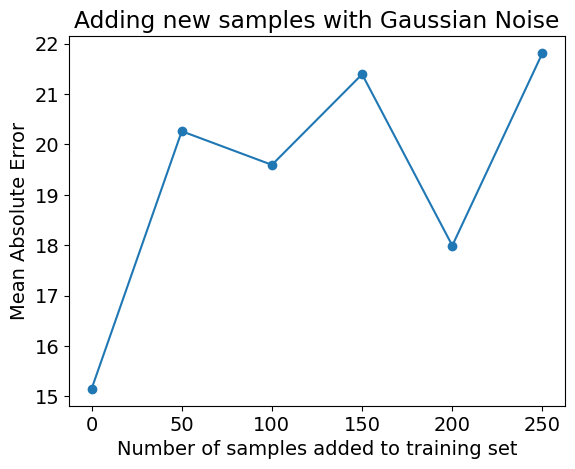

In [ ]:
n_new_samples_list_1 = [0] + n_new_samples_list
results_all_n_new_samples_1 = [means_MAE_list[0]] + results_all_n_new_samples

# Create a plot
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots()
ax.plot(n_new_samples_list_1, results_all_n_new_samples_1, marker = 'o')

ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('Number of samples added to training set')
plt.title('Adding new samples with Gaussian Noise')

ax.set_xticks([0,50,100,150,200,250])
plt.show()

## 2.3. SMOTE

- for each fold:
    - X_train, y_train, X_test and y_test
    - add y_train to X_train
    - set y_train as categorical for X_train
    - apply SMOTE
    - set y_train as the y previously added to X_train
    - Scaler fit and transform
    - model fit
    - model predict

In [61]:
# Define SMOTE, initiate the list of MAEs
ratios_min_maj_to_evaluate = [0.5,0.6,0.7,0.8,0.9,1]
MAEs_different_ratios_list = []

for ratio_min_maj in ratios_min_maj_to_evaluate:
    smote_resampling = SMOTE(random_state=42, k_neighbors=5, sampling_strategy=ratio_min_maj)
    MAEs_SMOTE_list = []

    for i, (train_index, test_index) in enumerate(loo_cv.split(X_PearsonCorr)):
        # Define train and test datasets
        X_train, y_train = X_PearsonCorr.iloc[train_index].copy(), y.iloc[train_index].copy()
        X_test, y_test = X_PearsonCorr.iloc[test_index], y.iloc[test_index]

        # add y_train column to X_train, define y_train_class
        X_train.loc[:, 'y'] = y_train
        y_train_class = (X_train['y'] <90).astype(int)
        
        # apply SMOTE
        X_train_augmented_SMOTE, y_train_augmented_SMOTE = smote_resampling.fit_resample(X_train, y_train_class)

        # Set y_train_resampling as the y column of X_train_augmented_SMOTE
        y_train_resampling = X_train_augmented_SMOTE['y'] # Use this y_train_resampling to fit the model

        #remove 'y' column from X_train_augmented_SMOTE
        X_train_augmented_SMOTE = X_train_augmented_SMOTE.drop(['y'], axis=1)

        # print('X_train_augmented_SMOTE.shape:', X_train_augmented_SMOTE.shape)

        # Standard Scaler
        scaler = StandardScaler()
        X_train_augmented_SMOTE = scaler.fit_transform(X_train_augmented_SMOTE)
        X_test = scaler.transform(X_test)

        y_train_resampling = y_train_resampling.values.ravel()

        # Fit the model to X_train and y_train (or resampled data)
        SVR_model.fit(X_train_augmented_SMOTE, y_train_resampling)
        
        y_pred_i = SVR_model.predict(X_test)
        MAE_fold_i = mean_absolute_error(y_test, y_pred_i)
        MAEs_SMOTE_list.append(MAE_fold_i)

    mean_MAE_SMOTE = np.mean(MAEs_SMOTE_list)
    MAEs_different_ratios_list.append(mean_MAE_SMOTE)
    print(f'Mean MAE score, using a ratio of {ratio_min_maj:.1f}: {mean_MAE_SMOTE:.3f}')

Mean MAE score, using a ratio of 0.5: 16.086
Mean MAE score, using a ratio of 0.6: 16.177
Mean MAE score, using a ratio of 0.7: 16.088
Mean MAE score, using a ratio of 0.8: 16.858
Mean MAE score, using a ratio of 0.9: 16.745
Mean MAE score, using a ratio of 1.0: 16.189


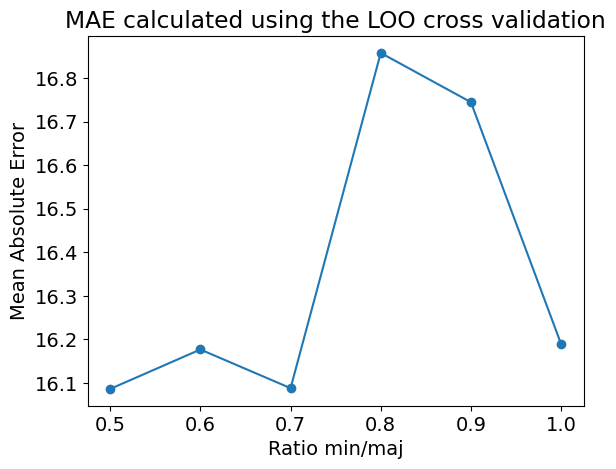

In [ ]:
# Create a plot
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots()
ax.plot(ratios_min_maj_to_evaluate, MAEs_different_ratios_list, marker = 'o')

ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('Ratio min/maj')
plt.title('MAE calculated using the LOO cross validation')

ax.set_xticks([0.5,0.6,0.7,0.8,0.9,1])
plt.show()

## 2.4. ADASYN 

In [ ]:
ADASYN_resampling = ADASYN(random_state=42, n_neighbors=5, sampling_strategy='auto')
MAEs_SMOTE_list = []

for i, (train_index, test_index) in enumerate(loo_cv.split(X_PearsonCorr)):
    # Define train and test datasets
    X_train, y_train = X_PearsonCorr.iloc[train_index].copy(), y.iloc[train_index].copy()
    X_test, y_test = X_PearsonCorr.iloc[test_index], y.iloc[test_index]

    # add y_train column to X_train, define y_train_class
    X_train.loc[:, 'y'] = y_train
    y_train_class = (X_train['y'] <90).astype(int)
        
    # apply SMOTE
    X_train_augmented_ADASYN, y_train_augmented_ADASYN = ADASYN_resampling.fit_resample(X_train, y_train_class)

    # Set y_train_resampling as the y column of X_train_augmented_SMOTE
    y_train_resampling = X_train_augmented_ADASYN['y'] # Use this y_train_resampling to fit the model

    #remove 'y' column from X_train_augmented_SMOTE
    X_train_augmented_ADASYN = X_train_augmented_ADASYN.drop(['y'], axis=1)

    # Standard Scaler
    scaler = StandardScaler()
    X_train_augmented_ADASYN = scaler.fit_transform(X_train_augmented_ADASYN)
    X_test = scaler.transform(X_test)

    y_train_resampling = y_train_resampling.values.ravel()

    # Fit the model to X_train and y_train (or resampled data)
    SVR_model.fit(X_train_augmented_ADASYN, y_train_resampling)
        
    y_pred_i = SVR_model.predict(X_test)
    MAE_fold_i = mean_absolute_error(y_test, y_pred_i)
    MAEs_SMOTE_list.append(MAE_fold_i)

mean_MAE_SMOTE = np.mean(MAEs_SMOTE_list)
print(f'Mean MAE score, ADASYN: {mean_MAE_SMOTE:.3f}')

Mean MAE score, ADASYN: 17.097


## 2.5. Random Over Sampler

In [ ]:
ROS_resampling = RandomOverSampler(random_state=42, sampling_strategy='auto')
MAEs_ROS_list = []

for i, (train_index, test_index) in enumerate(loo_cv.split(X_PearsonCorr)):
    # Define train and test datasets
    X_train, y_train = X_PearsonCorr.iloc[train_index].copy(), y.iloc[train_index].copy()
    X_test, y_test = X_PearsonCorr.iloc[test_index], y.iloc[test_index]

    # add y_train column to X_train, define y_train_class
    X_train.loc[:, 'y'] = y_train
    y_train_class = (X_train['y'] <90).astype(int)
        
    # apply SMOTE
    X_train_augmented_ROS, y_train_augmented_ROS = ROS_resampling.fit_resample(X_train, y_train_class)

    # Set y_train_resampling as the y column of X_train_augmented_SMOTE
    y_train_resampling = X_train_augmented_ROS['y'] # Use this y_train_resampling to fit the model

    #remove 'y' column from X_train_augmented_SMOTE
    X_train_augmented_ROS = X_train_augmented_ROS.drop(['y'], axis=1)

    # Standard Scaler
    scaler = StandardScaler()
    X_train_augmented_ROS = scaler.fit_transform(X_train_augmented_ROS)
    X_test = scaler.transform(X_test)

    y_train_resampling = y_train_resampling.values.ravel()

    # Fit the model to X_train and y_train (or resampled data)
    SVR_model.fit(X_train_augmented_ROS, y_train_resampling)
        
    y_pred_i = SVR_model.predict(X_test)
    MAE_fold_i = mean_absolute_error(y_test, y_pred_i)
    MAEs_ROS_list.append(MAE_fold_i)

mean_MAE_ROS = np.mean(MAEs_ROS_list)
print(f'Mean MAE score, Random Over Sampler: {mean_MAE_ROS:.3f}')

Mean MAE score, Random Over Sampler: 16.734
